# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [9]:
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]

In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [11]:
df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]

<ipython-input-11-00d328ef3340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]


In [12]:
dummies = pd.get_dummies(df_select['category'])
X = pd.concat([dummies, df_select[['amt', 'city_pop', 'time_var']]], axis = 1)
y = df_select['is_fraud']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [16]:
ros = RandomOverSampler(random_state = 0)
x_train_over, y_train_over = ros.fit_resample(x_train, y_train)

In [17]:
rus = RandomUnderSampler(random_state = 0)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

In [18]:
smote = SMOTE(random_state = 0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [65]:
x_train_smote

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,52.020000,2504700,23
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,46.370000,519,36
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.540000,255,31
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.930000,1758,38
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,62.610000,46563,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,813.435216,10256,35
774960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207.599293,10029,1
774961,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1023.911256,4878,21
774962,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1106.376043,96942,47


In [68]:
x_train_over

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,52.02,2504700,23
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,46.37,519,36
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.54,255,31
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.93,1758,38
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,62.61,46563,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774959,0,0,0,0,0,0,0,0,0,0,0,0,1,0,822.11,2097,56
774960,0,0,0,0,0,0,0,0,0,0,0,1,0,0,981.45,3495,34
774961,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7.60,3766,1
774962,0,0,0,0,0,0,0,0,0,0,0,0,1,0,677.65,20328,52


# 3.) Train three logistic regression models 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg_1 = LogisticRegression().fit(x_train_over, y_train_over)
log_reg_2 = LogisticRegression().fit(x_train_under, y_train_under)
log_reg_3 = LogisticRegression().fit(x_train_smote, y_train_smote)

Accuracy: 0.816682262050433


In [55]:
objects = list(x_train_smote.columns)
coef = [log_reg_1.coef_, log_reg_2.coef_, log_reg_3.coef_]
Type_list = ['Oversampling', 'Undersampling', 'SMOTE']

<Figure size 432x288 with 0 Axes>

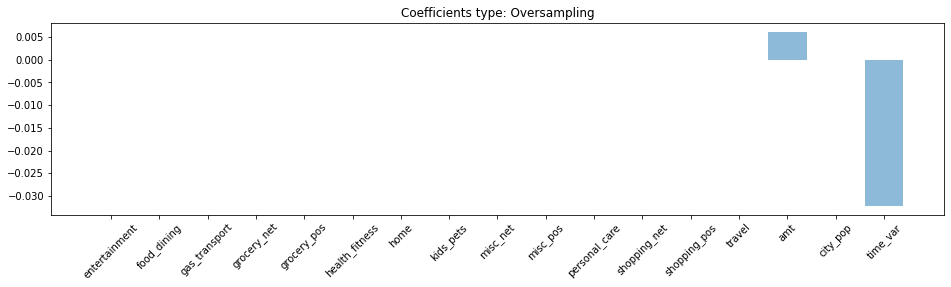

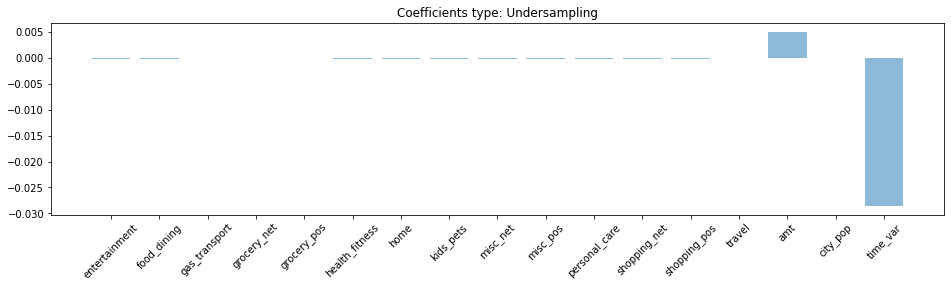

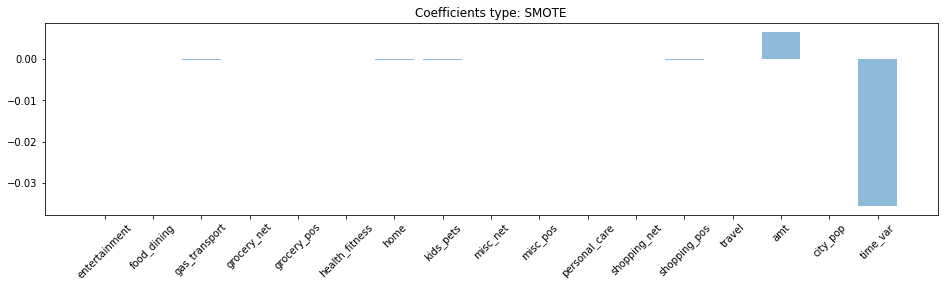

In [57]:
plt.tight_layout(pad = 1.0, w_pad = 2.5, h_pad = 2.5)

for i in range(0,3):
  plt.figure(figsize=(16,12))
  plt.subplot(3,1,1)
  plt.bar(objects, coef[i][0], align='center', alpha = 0.5)
  plt.xticks(objects, rotation=45)
  plt.title('Coefficients' + ' ' + 'type: {}'.format(Type_list[i]))
  plt.show()

# 4.) Test the three models

Test the accuracy for prediction:

In [58]:
print('Accuracy:', log_reg_1.score(x_test, y_test))
print('Accuracy:', log_reg_2.score(x_test, y_test))
print('Accuracy:', log_reg_3.score(x_test, y_test))

Accuracy: 0.816682262050433
Accuracy: 0.8287506897958204
Accuracy: 0.8225185345137839


Using Lasso Model to test the coefficients:

In [23]:
log_res_Lasso_1 = LogisticRegression("l1", solver = 'liblinear')
log_res_Lasso_1.fit(x_train_over, y_train_over)
log_res_Lasso_1.coef_

array([[-2.86791523e+00, -1.11015827e+00, -2.90296829e-02,
        -1.68024668e-01, -9.09970057e-01, -7.43742935e-01,
        -1.76198553e+00, -9.36681348e-01, -3.65394102e+00,
        -6.22496923e-01, -4.67051471e-01, -4.76257000e+00,
        -4.58264680e+00, -1.44516902e-01,  1.05379378e-02,
        -4.94983814e-07,  1.35286042e-04]])

In [25]:
log_res_Lasso_2 = LogisticRegression("l1", solver = 'liblinear')
log_res_Lasso_2.fit(x_train_under, y_train_under)
log_res_Lasso_2.coef_

array([[-1.50254346e+00, -2.58507455e-01,  8.37883587e-01,
         6.00357909e-01,  2.64339648e-01,  6.49323507e-02,
        -6.18162176e-01,  0.00000000e+00, -1.89539463e+00,
         0.00000000e+00,  8.67788978e-02, -2.43981609e+00,
        -2.80192355e+00,  5.64772937e-01,  8.23305171e-03,
        -5.28848467e-07,  1.57971920e-03]])

In [27]:
log_res_Lasso_3 = LogisticRegression("l1", solver = 'liblinear')
log_res_Lasso_3.fit(x_train_smote, y_train_smote)
log_res_Lasso_3.coef_

array([[-1.09076762e+01, -8.95591133e+00, -7.99748318e+00,
        -9.36000396e+00, -7.90647702e+00, -9.44458276e+00,
        -9.51975304e+00, -9.31563365e+00, -1.20085565e+01,
        -1.03908797e+01, -8.66994875e+00, -1.35119743e+01,
        -1.36449244e+01, -1.43945277e+01,  1.28599383e-02,
        -8.37058385e-07, -3.59160079e-03]])

In [48]:
coef_lasso = [log_res_Lasso_1.coef_, log_res_Lasso_2.coef_, log_res_Lasso_3.coef_]

<Figure size 432x288 with 0 Axes>

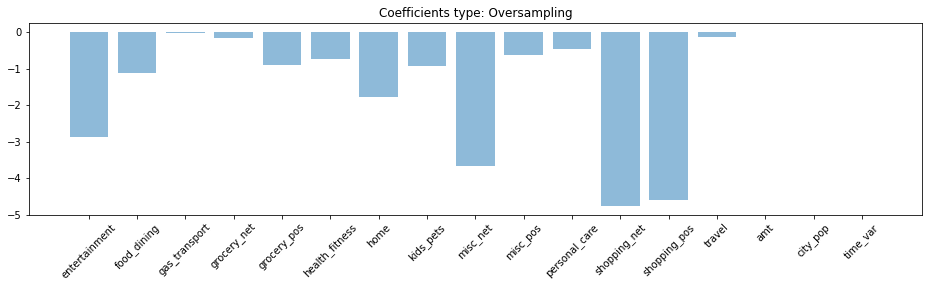

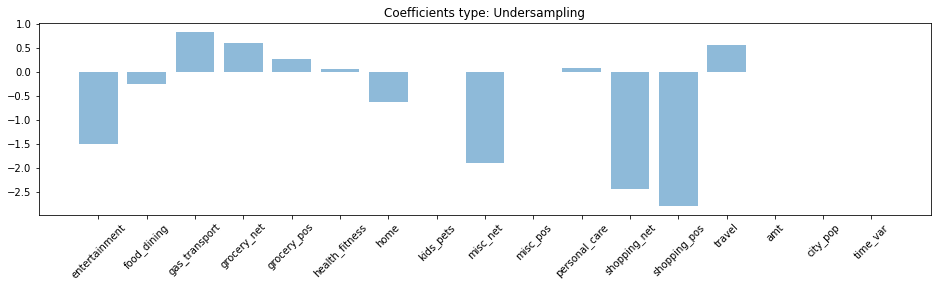

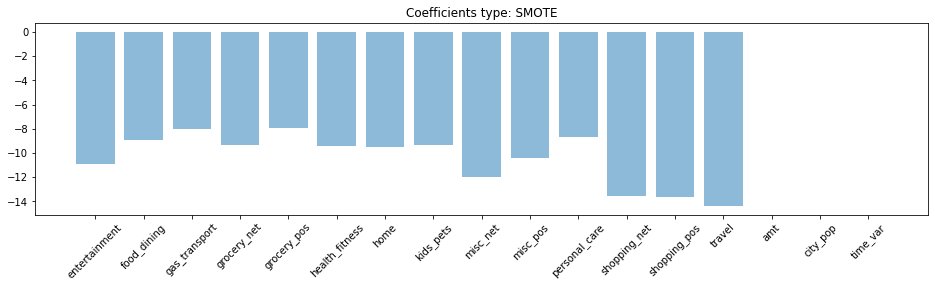

In [52]:
plt.tight_layout(pad = 1.0, w_pad = 2.5, h_pad = 2.5)

for i in range(0,3):
  plt.figure(figsize=(16,12))
  plt.subplot(3,1,1)
  plt.bar(objects, coef_lasso[i][0], align='center', alpha = 0.5)
  plt.xticks(objects, rotation=45)
  plt.title('Coefficients' + ' ' + 'type: {}'.format(Type_list[i]))
  plt.show()

# 5.) Which performed best in Out of Sample metrics?

Due to the result of prediction accuracy, the second model, which uses a undersampled dataset for training, has the best performance.

Also, the Lasso model indicates that $amt$, ${citypop}$, and $timevar$ is not suitable for prediction, the only qualified predictor is $category$.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [59]:
import matplotlib.pyplot as plt

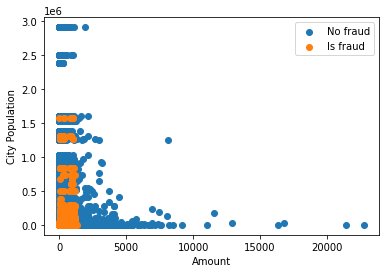

In [60]:
# Before SMOTE
OG_data_temp_before = pd.concat([x_train, y_train], axis = 1)

plt.scatter(OG_data_temp_before[OG_data_temp_before['is_fraud'] == 0]['amt'], OG_data_temp_before[OG_data_temp_before['is_fraud'] == 0]['city_pop'])
plt.scatter(OG_data_temp_before[OG_data_temp_before['is_fraud'] == 1]['amt'], OG_data_temp_before[OG_data_temp_before['is_fraud'] == 1]['city_pop'])
plt.legend(['No fraud', 'Is fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()

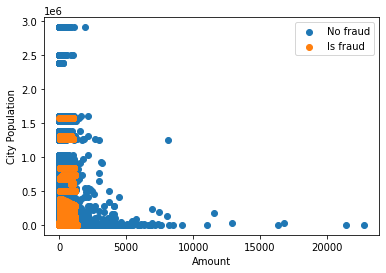

In [64]:
# After SMOTE
OG_data_temp_after = pd.concat([x_train_smote, y_train_smote], axis = 1)

plt.scatter(OG_data_temp_after[OG_data_temp_after['is_fraud'] == 0]['amt'], OG_data_temp_after[OG_data_temp_after['is_fraud'] == 0]['city_pop'])
plt.scatter(OG_data_temp_after[OG_data_temp_after['is_fraud'] == 1]['amt'], OG_data_temp_after[OG_data_temp_after['is_fraud'] == 1]['city_pop'])
plt.legend(['No fraud', 'Is fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()

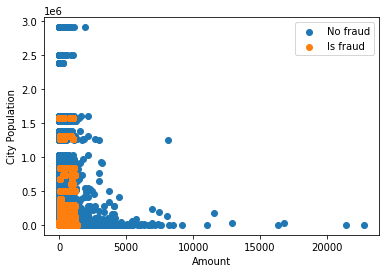